# Table of Contents

- [Importing the Data](#Importing-the-Data)
- [Exploring Individual Tables](#Exploring-Individual-Tables)
  - [ED Stays Table](#Exploring-Ed-Stays-Table)
  - [Admissions Table](#Exploring-Admissions-Table)
  - [Triage Table](#Exploring-Triage)
  - [Diagnosis Table](#Exploring-Diagnosis-Table)
- [Merging Tables](#Merging-Tables)
  - [Admission and Ed Stays](#Merging-Admissions-and-Ed-Stays)
- [Model Interpretation](#Model-Interpretation)

# Importing the Data

As this is a de-identified but still sensitve data, each team member will download from the source (physio.net) on their own

In [54]:
!ls ED

diagnosis.csv edstays.csv   medrecon.csv  triage.csv    vitalsign.csv


In [55]:
!ls HOSP

admissions.csv transfers.csv


In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# utility functions
from utils import nunique_per_cat

# utility class
from preprocess import PreprocessMIMIC

In [58]:
# modify this to direct to the data stored locally
file_paths = {
    'edstays': "ED/edstays.csv",
    'admissions': "HOSP/admissions.csv",
    'transfers': "HOSP/transfers.csv",
    'diagnosis': "ED/diagnosis.csv",
    'triage': "ED/triage.csv",
    'vitalsigns': 'ED/vitalsign.csv',
    'medrecon': 'ED/medrecon.csv'
}

In [59]:
# Load the dataframes using the file_paths dictionary
ed_stays = pd.read_csv(file_paths['edstays'])
admissions = pd.read_csv(file_paths['admissions'])
transfers = pd.read_csv(file_paths['transfers'])
diagnosis = pd.read_csv(file_paths['diagnosis'])
triage = pd.read_csv(file_paths['triage'])
vitalsigns = pd.read_csv(file_paths['vitalsigns'])
medrecon = pd.read_csv(file_paths['medrecon'])

In [60]:
# load the preprocessor class
preprocessor = PreprocessMIMIC()

In [61]:
# load the maps for specific features

# we could map 
# Mapping dictionary
race_mapping = {
    'WHITE': 'White/European Descent',
    'WHITE - RUSSIAN': 'White/European Descent',
    'WHITE - OTHER EUROPEAN': 'White/European Descent',
    'WHITE - BRAZILIAN': 'White/European Descent',
    'WHITE - EASTERN EUROPEAN': 'White/European Descent',
    'PORTUGUESE': 'White/European Descent',
    
    'BLACK/AFRICAN AMERICAN': 'Black/African Descent',
    'BLACK/CAPE VERDEAN': 'Black/African Descent',
    'BLACK/AFRICAN': 'Black/African Descent',
    'BLACK/CARIBBEAN ISLAND': 'Black/African Descent',
    
    'HISPANIC OR LATINO': 'Hispanic/Latino',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - DOMINICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - SALVADORAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - MEXICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CUBAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - HONDURAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic/Latino',
    'HISPANIC/LATINO - COLUMBIAN': 'Hispanic/Latino',
    'SOUTH AMERICAN': 'Hispanic/Latino',
    
    'ASIAN': 'Asian',
    'ASIAN - CHINESE': 'Asian',
    'ASIAN - SOUTH EAST ASIAN': 'Asian',
    'ASIAN - KOREAN': 'Asian',
    'ASIAN - ASIAN INDIAN': 'Asian',
    
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Native American/Pacific Islander',
    'AMERICAN INDIAN/ALASKA NATIVE': 'Native American/Pacific Islander',
    
    'MULTIPLE RACE/ETHNICITY': 'Mixed or Other',
    'OTHER': 'Mixed or Other',
    'UNABLE TO OBTAIN': 'Mixed or Other',
    'UNKNOWN': 'Mixed or Other',
    'PATIENT DECLINED TO ANSWER': 'Mixed or Other'
}

# Exploring Individual Tables

To get a sense of feel for the features, their object types, the distributions of numerical and cateogorical features/variables

## Exploring Ed Stays Table

In [62]:
preprocessor.print_info(ed_stays)

Information about the DataFrame
#########################
Shape of the df: (425087, 9)

Missing Values:
subject_id                0
hadm_id              222071
stay_id                   0
intime                    0
outtime                   0
gender                    0
race                      0
arrival_transport         0
disposition               0
dtype: int64

The number of unique values per 'object' dtype
[('gender', 2), ('arrival_transport', 5), ('disposition', 8), ('race', 33), ('intime', 422817), ('outtime', 423227)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         425087 non-null  int64  
 1   hadm_id            203016 non-null  float64
 2   stay_id            425087 non-null  int64  
 3   intime             425087 non-null  object 
 4   outtime            425087 non-null  object 
 5   gender 

In [63]:
# convert the time columns into datetime objects for analysis
preprocessor.convert_to_datetime(ed_stays, ['intime', 'outtime'])

# compute the length of stay for ed (in hours)
preprocessor.compute_LOS(ed_stays, 'intime', 'outtime', 'ed')

# attempting to group race into broader categories
preprocessor.map_to_group(ed_stays, 'race', race_mapping, fill_na = 'Other')

In [64]:
ed_stays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_los_hours,race_grouped
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,4.216667,White/European Descent
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,5.616667,White/European Descent
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,4.766667,White/European Descent
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,13.500000,White/European Descent
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,8.100000,White/European Descent


### Race-Based Analysis of Length of Stay
Question: Are there racial disparities in the length of ED stay?

<Figure size 1000x600 with 0 Axes>

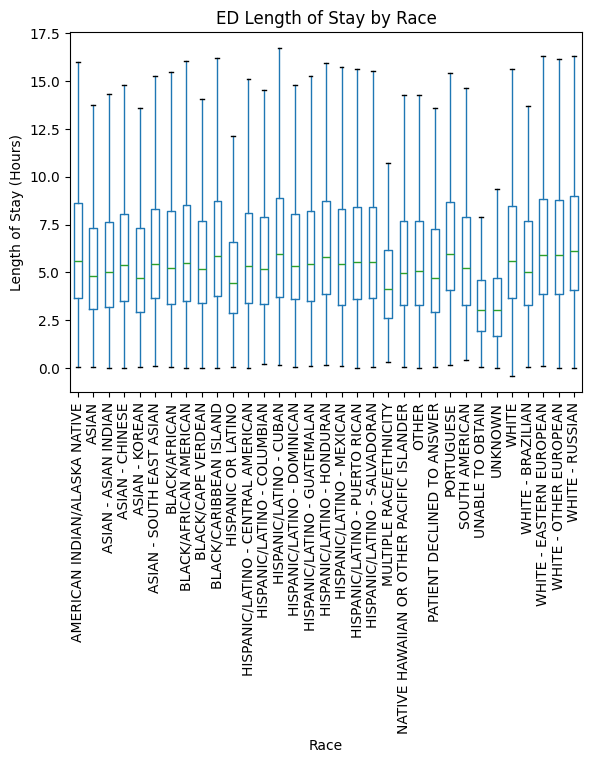

In [65]:
plt.figure(figsize=(10,6))
ed_stays.boxplot(column='ed_los_hours', by='race', grid=False, showfliers=False)
plt.title('ED Length of Stay by Race')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Race')
plt.ylabel('Length of Stay (Hours)')
plt.xticks(rotation=90)
plt.savefig("visualizations/ED-Stay-By-Race.png")
plt.show()

We can see theres a lot of variety, lets see the visualization after the grouping

<Figure size 1000x600 with 0 Axes>

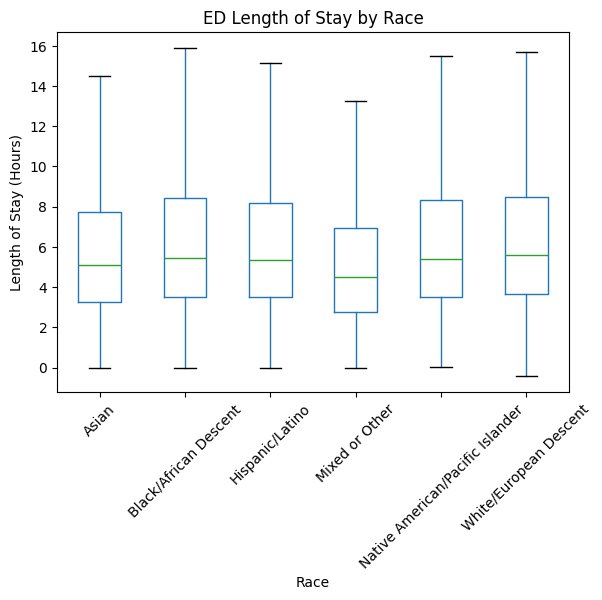

In [66]:
plt.figure(figsize=(10,6))
ed_stays.boxplot(column='ed_los_hours', by='race_grouped', grid=False, showfliers=False)
plt.title('ED Length of Stay by Race')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Race')
plt.ylabel('Length of Stay (Hours)')
plt.xticks(rotation=45)
plt.savefig("visualizations/ED-Stay-By-Race.png")
plt.show()

Here we can see 'Mixed or Other' categroy has lower median and IQR ranges compared to the other groups

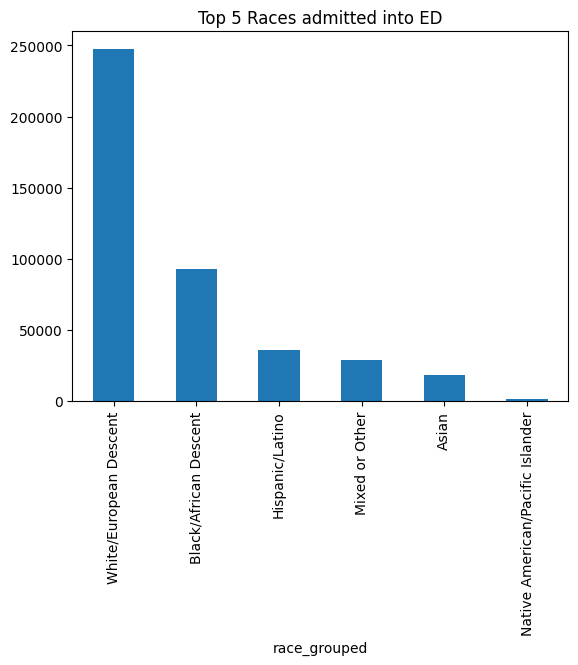

In [67]:
# can see race breakdown
ed_stays['race_grouped'].value_counts()[:6].plot.bar()
plt.title("Top 5 Races admitted into ED");
plt.show()

Here we can see there it is a huge disparity between the most frequent group (White) compared to the rest of the groups. It appears Native American/Pacific Islander is very rare.

### Distribution of Length of Stay

Question: What is the distribution of the length of stay (time) in the ED?

In [69]:
ed_los_max = ed_stays['ed_los_hours'].max()
ed_los_min = ed_stays['ed_los_hours'].min()

print(f'The range of length of stay duration (hours) is:\n(min: {ed_los_min}, max: {ed_los_max})\nRange: {(ed_los_max - ed_los_min)}')

The range of length of stay duration (hours) is:
(min: -22.733333333333334, max: 493.06944444444446)
Range: 515.8027777777778


It is uncertain if the maximum value is a valid measurement, however it would be roughly 4 years in the ED which seems unlikely. Taking into account that there is a min of negative which appears impossible (can't have negative duration for length of stay)

We should clean up and remove extreme outliers and set a lower bound 0

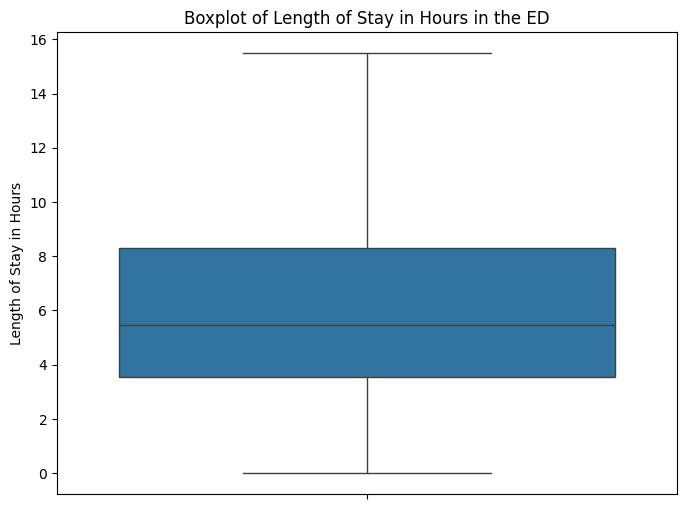

In [70]:
ed_stays = preprocessor.filter_outliers(ed_stays, 'ed_los_hours')

# drop rows with less than 0
ed_stays = ed_stays[ed_stays['ed_los_hours'] >= 0]

# create the boxplot
plt.figure(figsize=(8, 6))
g = sns.boxplot(y='ed_los_hours', data = ed_stays)
g.set_title('Boxplot of Length of Stay in Hours in the ED')
g.set_ylabel("Length of Stay in Hours")
plt.savefig("visualizations/Boxplot-length-of-stay.png")
plt.show()

Note: The median of the legnth of stay is about 5 hours

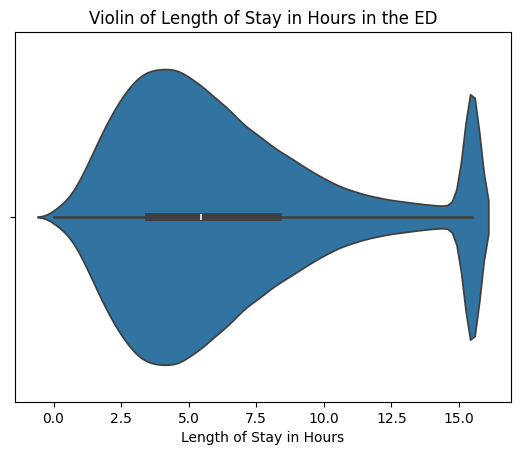

In [71]:
# a violin plot to allow to see the shape of the distribution in terms of frequency
g = sns.violinplot(x = ed_stays['ed_los_hours'], fill=True)
g.set_title('Violin of Length of Stay in Hours in the ED')
g.set_xlabel("Length of Stay in Hours")
plt.savefig("visualizations/violin-length-of-stay.png")
plt.show()

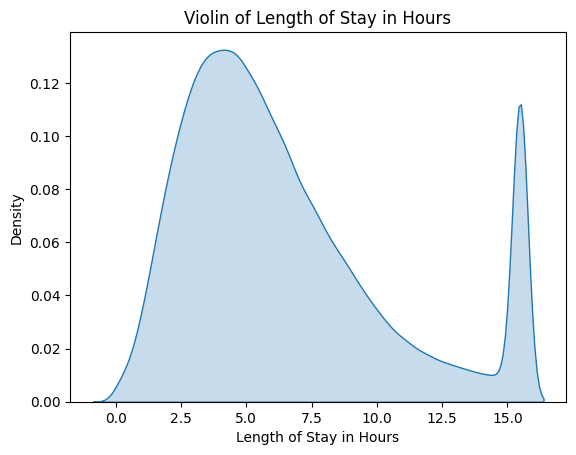

In [72]:
g = sns.kdeplot(x = ed_stays['ed_los_hours'], fill=True)
g.set_title('Violin of Length of Stay in Hours')
g.set_xlabel("Length of Stay in Hours")
plt.show()

We see that the distribution appears to be a right skewed normal distribution. This makes sense, as most patients in for about 2.5 to 7.5 hours. Afterwards there might be cases where long observation is needed and the patient needs to stay longer. 

You can see the effect, we create two peaks which could be interpreted as two types of patients, one that stay in the range of 2.5 to 7.5 hours compared to another group of patients that stay for over 12 hours. This could possbily be due to more severe/urgent conditions 

### Patient Flow by Time of Day

Question: When are most patients arriving and leaving the ED?

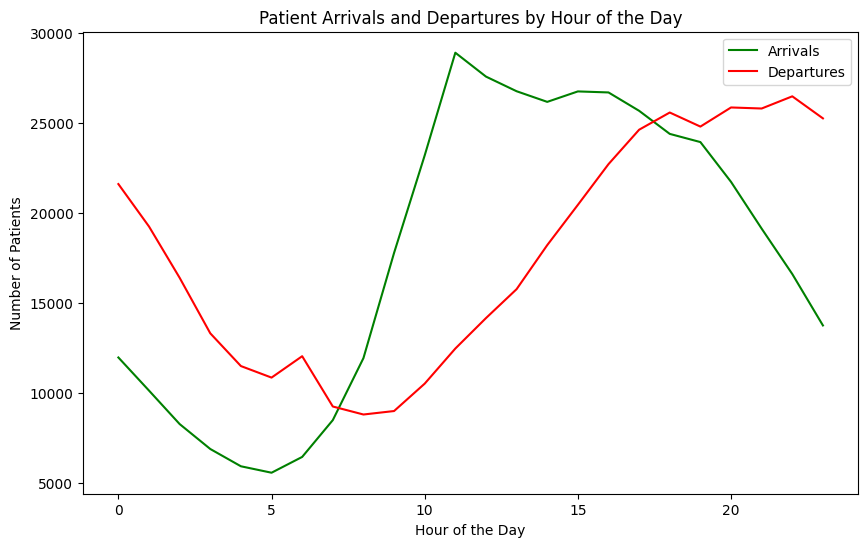

In [73]:
# extract the hour of arrival and departure
ed_stays['arrival_hour'] = ed_stays['intime'].dt.hour
ed_stays['departure_hour'] = ed_stays['outtime'].dt.hour

# now plot number of arrivals and departures by hour
plt.figure(figsize=(10,6))
ed_stays['arrival_hour'].value_counts().sort_index().plot(kind='line', label='Arrivals', color='green')
ed_stays['departure_hour'].value_counts().sort_index().plot(kind='line', label='Departures', color='red')
plt.title('Patient Arrivals and Departures by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Patients')
plt.legend()
plt.savefig('visualizations/Arrivals-Departures-by-hour.png')
plt.show()

We can see the number of arrivals peaks around 10-12, which makes sense as it is the peak of the day with the most activity. We can see that the departures lags behind the arrivals which also is a sanity check

### Patient Disposition Analysis
Question: How are patients leaving the ED (e.g., admitted, discharged, transferred)?

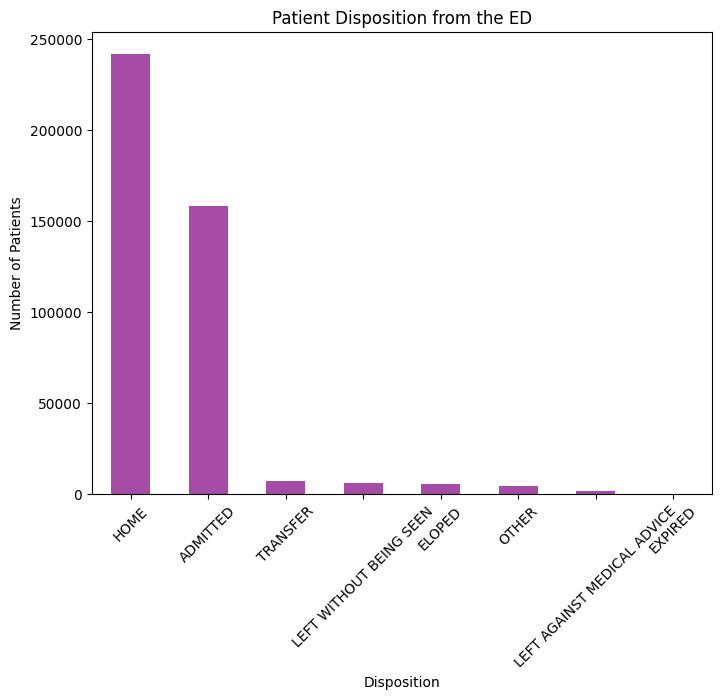

In [75]:
plt.figure(figsize=(8,6))
ed_stays['disposition'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Patient Disposition from the ED')
plt.xlabel('Disposition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

The majority go back home after the stay, the the next biggest group are admitted into the hospital.

The rest are transfered or leave

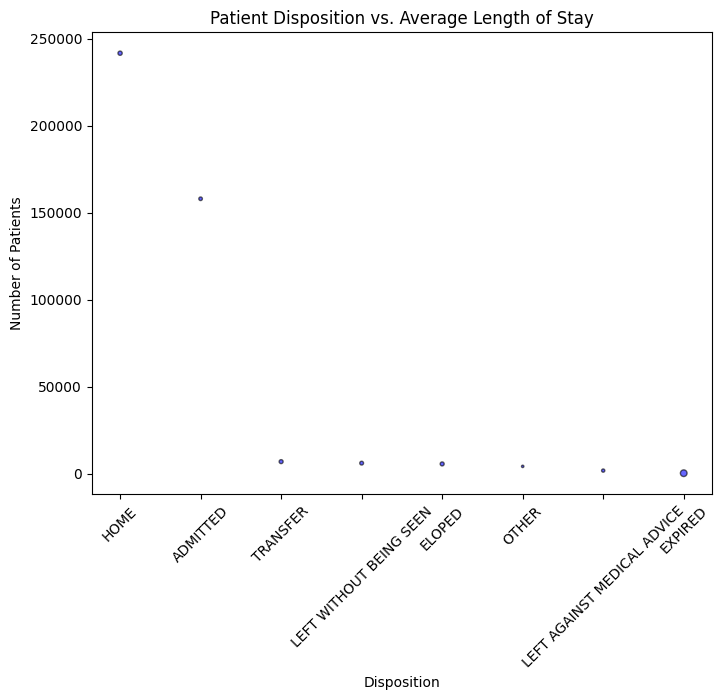

In [76]:
import matplotlib.pyplot as plt

# calculate average length of stay per disposition
disposition_los = ed_stays.groupby('disposition')['ed_los_hours'].median()

# get the count of each disposition
disposition_counts = ed_stays['disposition'].value_counts()

# create the bubble plot
plt.figure(figsize=(8,6))

# The size of the bubbles is proportional to the average length of stay
bubble_sizes = disposition_los * 1.5 # Adjust scaling factor for better visibility

# create scatter plot (bubble plot)
plt.scatter(disposition_counts.index, disposition_counts.values, s=bubble_sizes, alpha=0.6, color='blue', edgecolor='black', linewidth=1)

plt.title('Patient Disposition vs. Average Length of Stay')
plt.xlabel('Disposition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.show()

### Patient Arrival Transport:
Q: Does Length of Stay depend on the mode of arrival transportation?

<Figure size 1000x600 with 0 Axes>

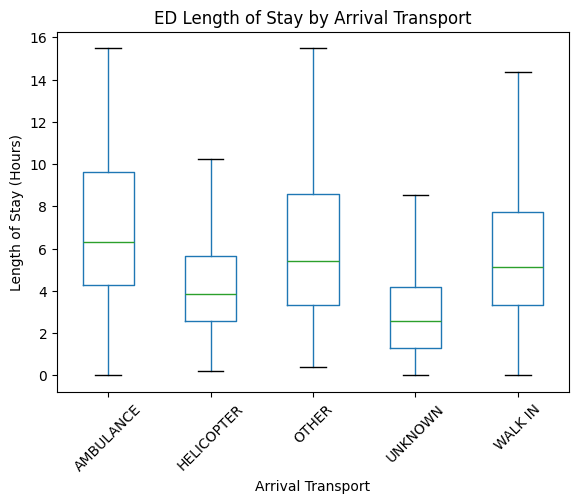

In [77]:
plt.figure(figsize=(10,6))
ed_stays.boxplot(column='ed_los_hours', by='arrival_transport', grid=False, showfliers=False)
plt.title('ED Length of Stay by Arrival Transport')
plt.suptitle('') 
plt.xlabel('Arrival Transport')
plt.ylabel('Length of Stay (Hours)')
plt.xticks(rotation=45)
plt.show()

We can see that Helicopter and Unkown show the shortest lengths of stays

-> This could be because most severe and urgent cases are taken in by helicopter, thus the patients arriving throuhg helicopter receive the most urgent care

### Gender Difference in Length of Stay

Question: Is there a differnece in the length of stay between genders?

<Figure size 800x600 with 0 Axes>

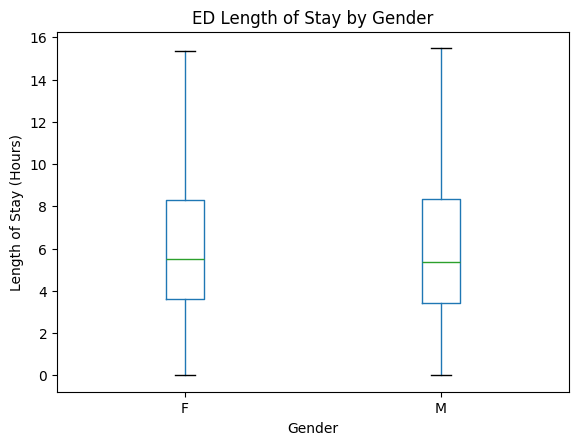

In [78]:
plt.figure(figsize=(8,6))
ed_stays.boxplot(column='ed_los_hours', by='gender', grid=False, showfliers=False)
plt.title('ED Length of Stay by Gender')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Gender')
plt.ylabel('Length of Stay (Hours)')
plt.show()

There appears to be no differences in the length of stsay by gender. 

### Seasonal or Monthly Trends
Question: Are there any seasonal trends in ED stays (e.g., more patients in the winter or in the summer)?

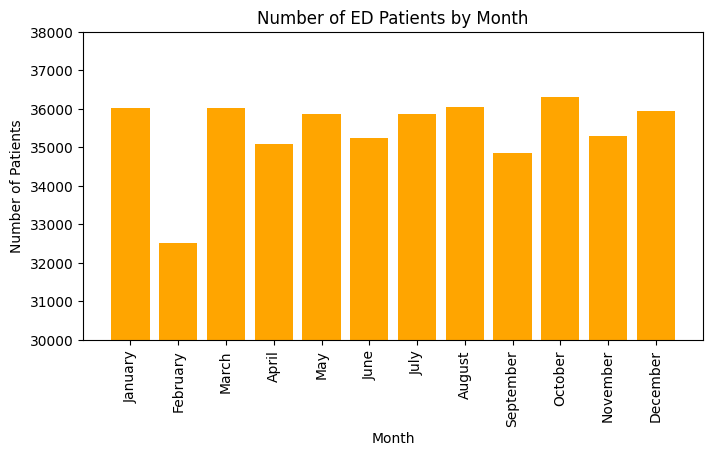

In [79]:
ed_stays['month'] = ed_stays['intime'].dt.month

# we can create a mapping 
months_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

plt.figure(figsize=(8,4))

stays_by_month = ed_stays['month'].value_counts().sort_index()

plt.bar(months_mapping.values(), stays_by_month, color='orange')
plt.title('Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.ylim(30000, 38000)
plt.show()

It's hard to see the differences in the absolute counts per month. 

Trying cuberoot and log doesn't help much. 

We can use percent change to see the relative change over the year

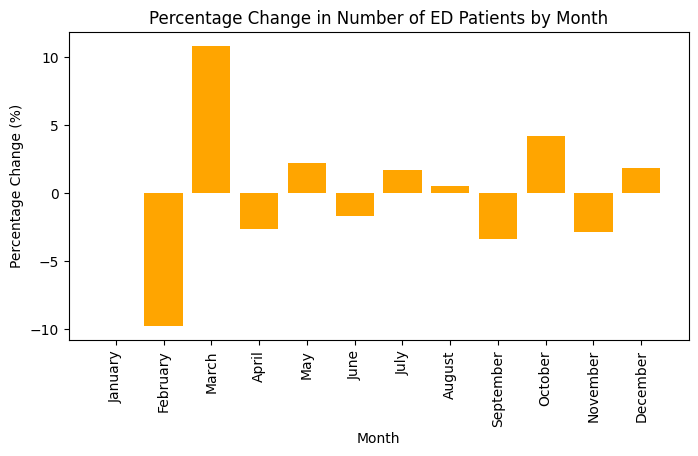

In [80]:
plt.figure(figsize=(8, 4))

# compute the percetnage change by month
percentage_change = stays_by_month.pct_change().fillna(0) * 100

# plot the percentages chagne
plt.bar(months_mapping.values(), percentage_change, color='orange')
plt.title("Percentage Change in Number of ED Patients by Month")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Percentage Change (%)")
plt.show()

We see an interesting pattern of fluctuating number of patients each month. It appears there is a cycle of percentage change up and down every two months.

We could also 

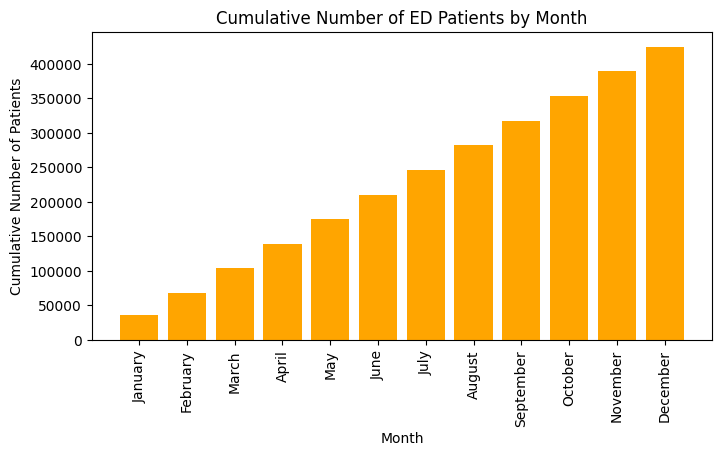

In [81]:
plt.figure(figsize=(8,4))
# calculate cumulative sum
cumulative_stays_by_month = stays_by_month.cumsum()

# plot the cumulative sum over time
plt.bar(months_mapping.values(), cumulative_stays_by_month, color='orange')
plt.title('Cumulative Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Patients')
plt.show()

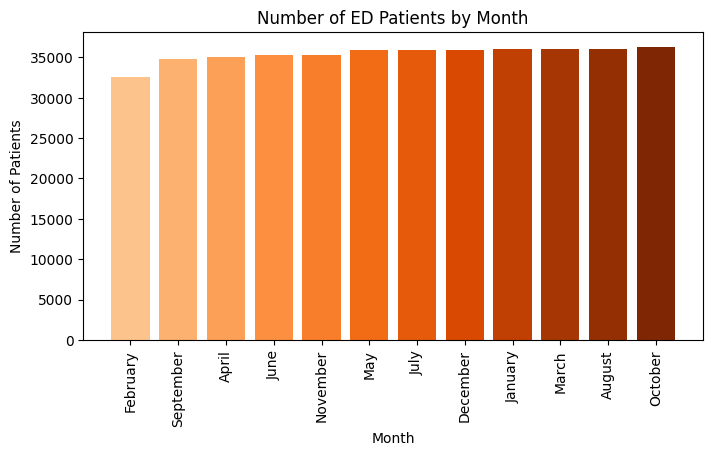

In [82]:
plt.figure(figsize=(8,4))

# Sort by number of patients
sorted_stays_by_month = stays_by_month.sort_values()

# Plot with color gradient (e.g., darker colors for higher values)
plt.bar(sorted_stays_by_month.index.map(months_mapping), sorted_stays_by_month, color=plt.cm.Oranges(np.linspace(0.3, 1, len(stays_by_month))))
plt.title('Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.show()

## Exploring Admissions Table

In [83]:
preprocessor.print_info(admissions)

Information about the DataFrame
#########################
Shape of the df: (546028, 16)

Missing Values:
subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               534238
admission_type               0
admit_provider_id            4
admission_location           1
discharge_location      149818
insurance                 9355
language                   775
marital_status           13619
race                         0
edregtime               166788
edouttime               166788
hospital_expire_flag         0
dtype: int64

The number of unique values per 'object' dtype
[('marital_status', 4), ('insurance', 5), ('admission_type', 9), ('admission_location', 11), ('discharge_location', 13), ('language', 25), ('race', 33), ('admit_provider_id', 2045), ('deathtime', 11788), ('edregtime', 372692), ('edouttime', 372755), ('dischtime', 528871), ('admittime', 534919)]

<class 'pandas.core.frame.DataFrame'>
Ran

In [84]:
# preprocess steps of admissions

# convert to datetimes
preprocessor.convert_to_datetime(admissions, ['admittime', 'dischtime', 'edregtime', 'edouttime'])

# compute length of stay
preprocessor.compute_LOS(admissions, 'admittime', 'dischtime', prefix="admission")

# apply maps
preprocessor.map_to_group(admissions, 'race', race_mapping, fill_na='Other')

In [85]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,admission_los_hours,race_grouped
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,18.866667,White/European Descent
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,24.366667,White/European Descent
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,42.100000,White/European Descent
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,53.333333,White/European Descent
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,7.166667,White/European Descent


The columns of interest are:

- `admittime` and `dischtime` -> we can compute the length of stay in the hospital and possibly compare this distribution to the one of the ED stays

- For `admission_location`, `insurance`, `marital_status` and `race_grouped` we can compute aggregate statistics on length of stay

- We have `deathtime`, we could separate the patients who died compared to those who didn't 

### Analysis of Distribution for Length of Stay duration

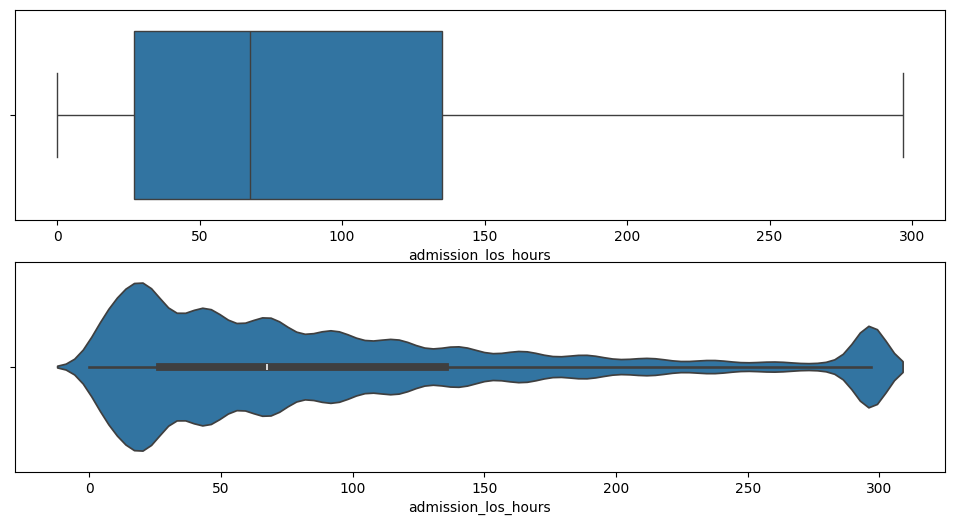

In [86]:
# cap outliers to bounds
preprocessor.filter_outliers(admissions, 'admission_los_hours')

# disallow negative values
admissions = admissions[admissions['admission_los_hours'] > 0]

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.boxplot(x = 'admission_los_hours', data = admissions, ax = axes[0])
sns.violinplot(x = 'admission_los_hours', data = admissions, ax = axes[1])
plt.show()

It appears theres variation every day, you can see the large peaks at the every 24 hour mark, and its with gradual diminishing every day

We can see that the IQR or 50% of the values fall between 1 to 4 days, showcasing that most patients stay within this time range. Then theres many right skewed outliers, those who stay for over 10 days at the hospital.

Comparing to the distribution of the lenght of stay for ED, it is longer as the range was about 0-16 hours most patients who go to ED stay for. We can see for the hospital the magnitude of stay duration is more in days than hours. This makes sense as the ED is for emergencies/urgent cases and would be try to be seen as quickly as possible to resolve the possible issues

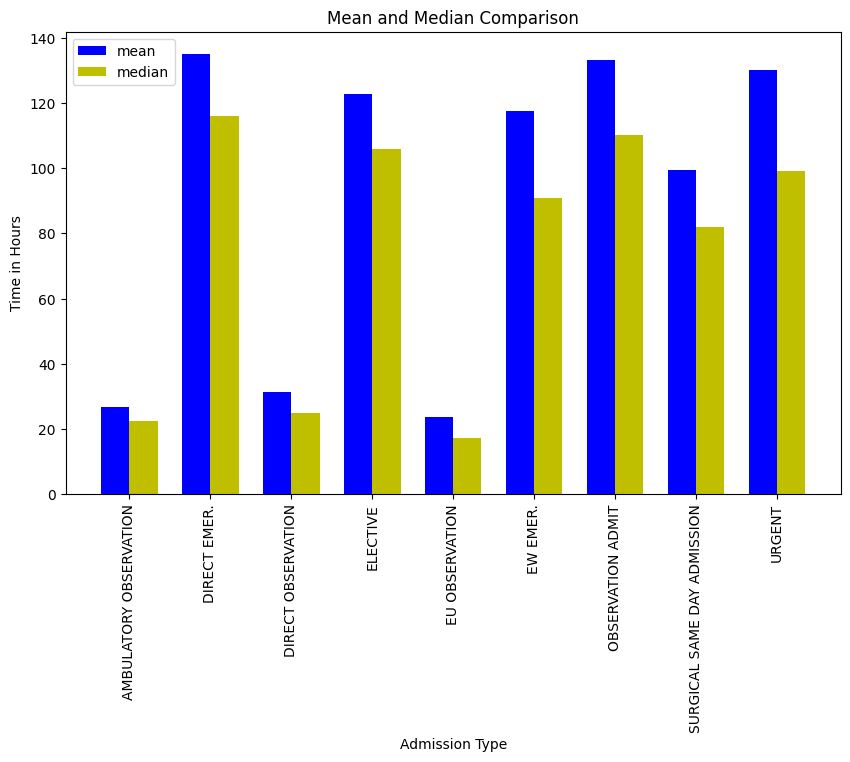

In [89]:
duration_by_type = admissions.groupby("admission_type")['admission_los_hours'].agg(['mean', 'median', 'count'])

categories = duration_by_type.index

bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, duration_by_type['mean'], bar_width, label='mean', color ='b')
ax.bar(x + bar_width/2, duration_by_type['median'], bar_width, label='median', color='y')

ax.set_xlabel("Admission Type")
ax.set_ylabel("Time in Hours")
ax.set_title("Mean and Median Comparison")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend(loc='best')
plt.show()

### Length of Stay by Race - Admissions Table

Question: Is the Admission duration (length of stay) contains racial disparities?

In [91]:
admission_duration_by_race = admissions.groupby("race_grouped")['admission_los_hours'].median()

admission_duration_by_race

race_grouped
Asian                               64.716667
Black/African Descent               59.800000
Hispanic/Latino                     54.758333
Mixed or Other                      81.650000
Native American/Pacific Islander    67.600000
White/European Descent              69.416667
Name: admission_los_hours, dtype: float64

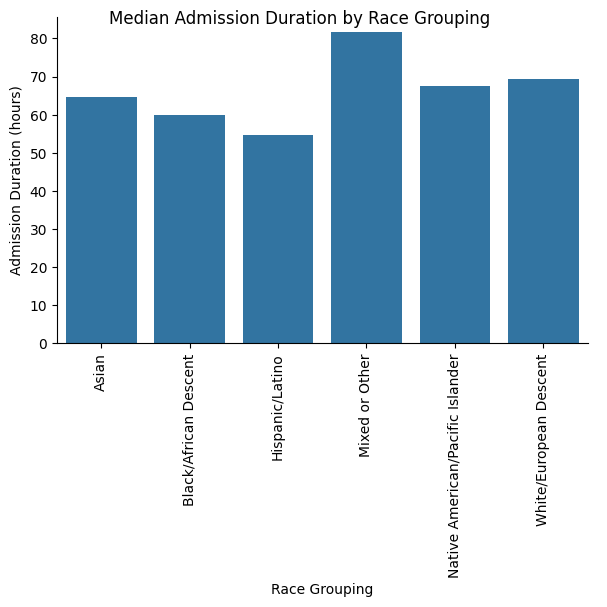

In [92]:
g = sns.catplot(x = admission_duration_by_race.index, y = admission_duration_by_race, kind='bar', height = 4, aspect = 1.5)
plt.xticks(rotation = 90)
g.set_axis_labels("Race Grouping", "Admission Duration (hours)")
g.fig.suptitle("Median Admission Duration by Race Grouping")
plt.savefig("visualizations/admission-duration-by-race-grouped.png")
plt.show()

## Exploring Triage

In [40]:
triage_df = pd.read_csv("ED/triage.csv")

triage_df.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [41]:
triage_df.chiefcomplaint.nunique()

60406

In [42]:
# some descriptive statistics
triage_df.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity
count,4.250870e+05,4.250870e+05,401672.000000,407997.000000,404734.000000,404491.000000,406796.000000,405996.000000,418100.000000
mean,1.500871e+07,3.499735e+07,98.015046,85.079891,17.565521,98.471888,135.395352,81.262126,2.625102
std,2.878486e+06,2.888342e+06,4.008575,18.041690,5.485706,17.040807,240.956408,1057.220031,0.708084
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.251789e+07,3.249799e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000
50%,1.501628e+07,3.499395e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000
75%,1.749900e+07,3.750387e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,1820.000000,9322.000000,151103.000000,661672.000000,5.000000


It appears there are mistakes for certain entries

-> For example heartrate cannot be 1228 bpm or sbp being 151103 

This is impossible we need to remove or fix these mistakes

In [43]:
from utils import min_max_for_cols

min_max_for_cols(triage_df)

subject_id - min: 10000032, max: 19999987
stay_id - min: 30000012, max: 39999965
temperature - min: 0.1, max: 986.0
heartrate - min: 1.0, max: 1228.0
resprate - min: 0.0, max: 1820.0
o2sat - min: 0.0, max: 9322.0
sbp - min: 1.0, max: 151103.0
dbp - min: 0.0, max: 661672.0
acuity - min: 1.0, max: 5.0


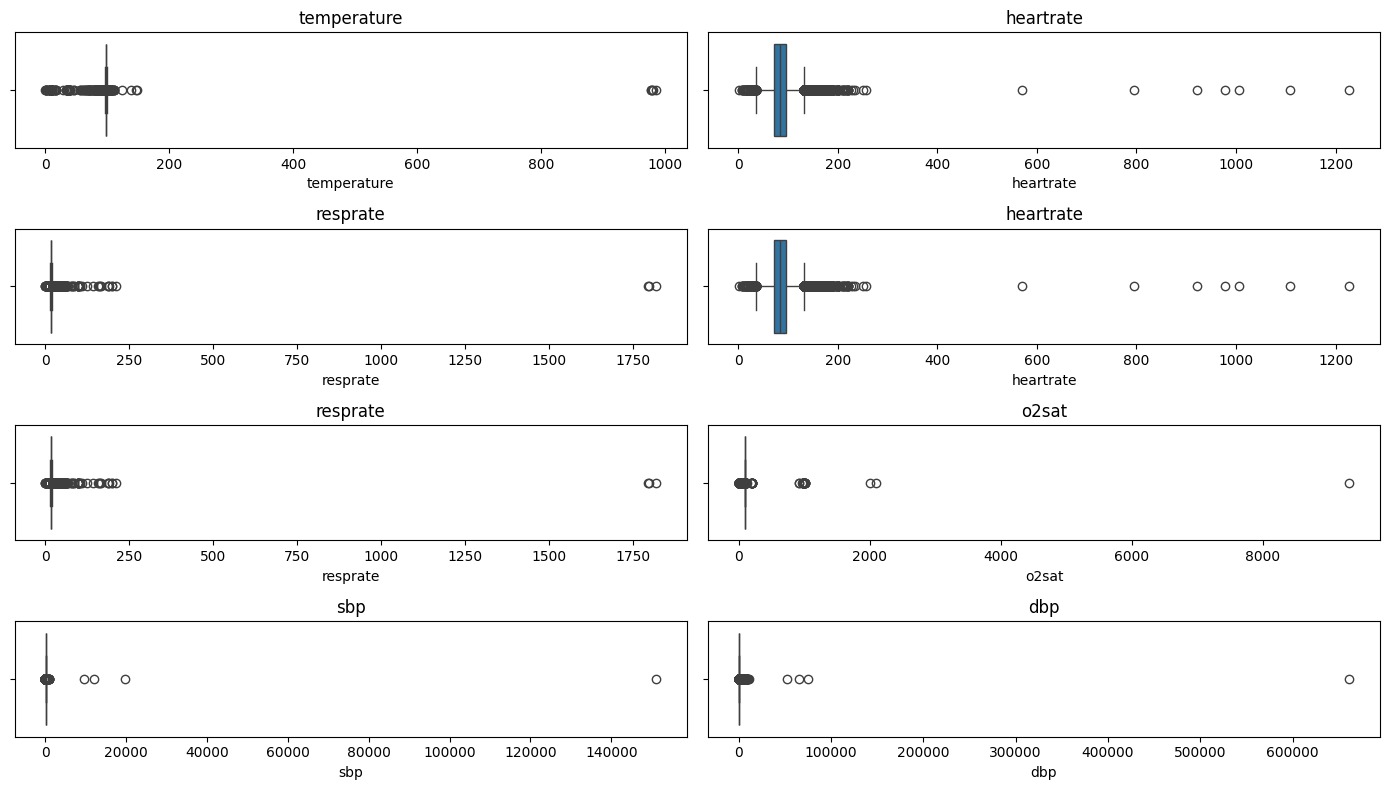

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(14, 8))

axes = axes.ravel()
num_cols = ['temperature', 'heartrate', 'resprate', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

for i, col in enumerate(triage_df[num_cols].columns):
    g = sns.boxplot(x=col, data=triage_df, ax = axes[i])
    g.set_title(f'{col}')

plt.tight_layout()
plt.show()

**Vital Signs Reference Ranges**

**Temperature:**

* Valid range: 95.0°F - 107.6°F (35°C - 42°C)
* Normal range: 97.8°F - 99.1°F (36.5°C - 37.3°C)
* Source: The average normal core temperature is generally considered to be between 97.8°F and 99.1°F (36.5°C to 37.3°C). Temperatures outside the wider range of 95.0°F - 107.6°F are likely errors or extreme medical emergencies.

**Heart Rate:**

* Valid range: 20 - 250 beats per minute
* Normal range for adults: 60 - 100 beats per minute
* Source: For adults, a normal resting heart rate is between 60 and 100 beats per minute (bpm). The wider range accounts for extreme bradycardia and tachycardia.

**Respiratory Rate:**

* Valid range: 4 - 60 breaths per minute
* Normal range for adults: 12 - 20 breaths per minute
* Source: A normal respiratory rate for an adult at rest is 12 to 20 breaths per minute.

**Oxygen Saturation (O2sat):**

* Valid range: 70% - 100%
* Normal range: 95% - 100%
* Source: Normal oxygen levels are greater than 92% on room air. Values below 70% are extremely rare and likely errors.

**Systolic Blood Pressure (SBP):**

* Valid range: 50 - 250 mmHg
* Normal range for adults: 90 - 120 mmHg
* Source: Normal blood pressure is between 90/60 mmHg and 120/80 mmHg.

**Diastolic Blood Pressure (DBP):**

* Valid range: 20 - 150 mmHg
* Normal range for adults: 60 - 80 mmHg
* Source: Normal blood pressure is between 90/60 mmHg and 120/80 mmHg

**Sources:**

* https://emedicine.medscape.com/article/2172054-overview?form=fpf
* https://soteradigitalhealth.com/blog/vital-signs-how-to-measure-and-whats-the-normal-range
* https://www.medicalnewstoday.com/articles/vital-signs
* https://www.healthline.com/health/dangerous-heart-rate

In [45]:
# set thresholds based on reasonable medical ranges
valid_ranges = {
    'temperature': (95.0, 107.6),
    'heartrate': (20, 250),      
    'resprate': (4, 60),
    'o2sat': (70, 100),            
    'sbp': (50, 250),
    'dbp': (20, 150)               
}

# function to clean the outliers based on thresholds
def clean_outliers(df, column, valid_range):
    lower, upper = valid_range
    df[column] = df[column].apply(lambda x: x if lower <= x <= upper else None)  # Set outliers to None
    return df

# apply the cleaning to the appropriate columns
for column, valid_range in valid_ranges.items():
    triage_df = clean_outliers(triage_df, column, valid_range)

# drop rows with any remaining NaN values in the key columns (optional)
triage_cleaned = triage_df.dropna(subset=valid_ranges.keys())

In [46]:
triage_cleaned[num_cols].describe()

,temperature,heartrate,resprate,heartrate,resprate,o2sat,sbp,dbp
count,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000
mean,98.088897,84.953636,17.512279,84.953636,17.512279,98.418361,135.030745,77.474362
std,0.948370,17.390274,2.229031,17.390274,2.229031,1.964901,22.059855,14.530137
min,95.000000,20.000000,4.000000,20.000000,4.000000,70.000000,50.000000,20.000000
25%,97.600000,72.000000,16.000000,72.000000,16.000000,97.000000,120.000000,68.000000
50%,98.000000,84.000000,18.000000,84.000000,18.000000,99.000000,133.000000,77.000000
75%,98.600000,96.000000,18.000000,96.000000,18.000000,100.000000,148.000000,87.000000
max,106.600000,250.000000,60.000000,250.000000,60.000000,100.000000,250.000000,150.000000


In [47]:
# we could explore the chief complaint and map to a smaller dimension of topics/keywords
triage_df.chiefcomplaint

0                                      Hypotension
1                   Abd pain, Abdominal distention
2                                  n/v/d, Abd pain
3                             Abdominal distention
4         Abdominal distention, Abd pain, LETHAGIC
                            ...                   
425082                                Abnormal MRI
425083                        Abd pain, Wound eval
425084                        Abd pain, Wound eval
425085        Altered mental status, Substance use
425086                                  HEAD BLEED
Name: chiefcomplaint, Length: 425087, dtype: object

In [48]:
triage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      425087 non-null  int64  
 1   stay_id         425087 non-null  int64  
 2   temperature     400846 non-null  float64
 3   heartrate       407967 non-null  float64
 4   resprate        404676 non-null  float64
 5   o2sat           404301 non-null  float64
 6   sbp             406535 non-null  float64
 7   dbp             405254 non-null  float64
 8   pain            412154 non-null  object 
 9   acuity          418100 non-null  float64
 10  chiefcomplaint  425064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 35.7+ MB


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = triage_cleaned[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'acuity']]
X = X.dropna()

sc = StandardScaler()
sc.fit_transform(X)

# perform pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca[:5]

array([[-72.38999429,   4.71349844],
       [-33.19549341, -13.04817022],
       [-33.81728037,  19.83348868],
       [-12.67277252,   7.76127454],
       [-47.32897254,  -7.26863403]])

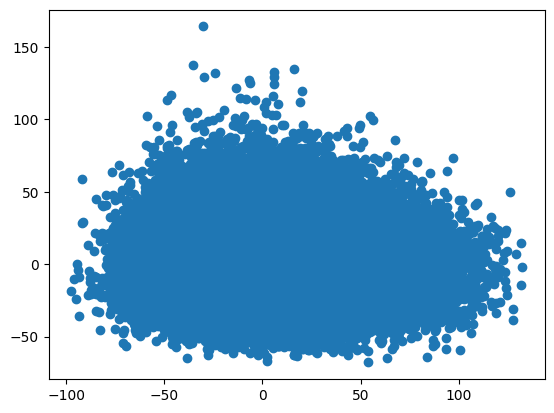

In [50]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

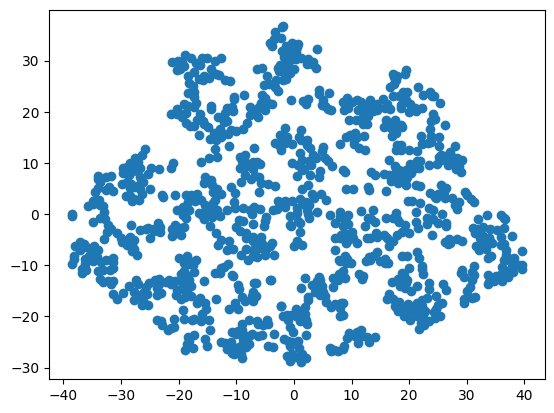

In [51]:
tsne = TSNE(n_components=2)
# tsne scales poorly -> use a sample
X_tnse = tsne.fit_transform(X.sample(1000, replace=True))

plt.scatter(X_tnse[:, 0], X_tnse[:, 1])
plt.show()

### What is the distribution of acuity?

In [69]:
acuity_counts = triage_cleaned.acuity.value_counts()

acuity_counts

acuity
3.0    217232
2.0    130707
4.0     27592
1.0     14076
5.0      1036
Name: count, dtype: int64

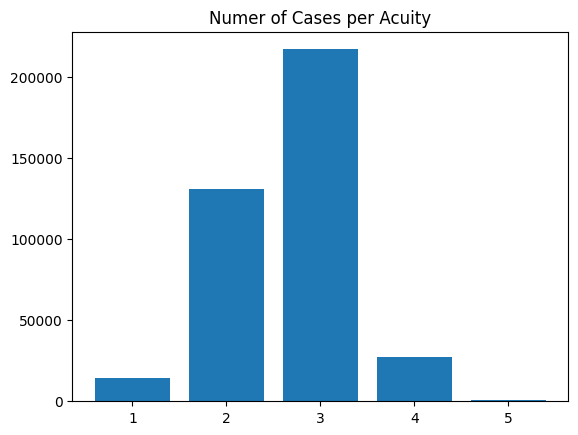

In [70]:
plt.bar(acuity_counts.index, acuity_counts)
plt.title("Numer of Cases per Acuity")
plt.show()

We could try to group length of stay with acuity level

In [77]:
# merging with admissions
admissions_triage = admissions.merge(triage_cleaned, on ='subject_id', how = 'inner')

admissions_triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543898 entries, 0 to 2543897
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   subject_id            int64         
 1   hadm_id               int64         
 2   admittime             datetime64[ns]
 3   dischtime             datetime64[ns]
 4   deathtime             datetime64[ns]
 5   admission_type        object        
 6   admit_provider_id     object        
 7   admission_location    object        
 8   discharge_location    object        
 9   insurance             object        
 10  language              object        
 11  marital_status        object        
 12  race                  object        
 13  edregtime             datetime64[ns]
 14  edouttime             datetime64[ns]
 15  hospital_expire_flag  int64         
 16  admit_duration        float64       
 17  admit_duration_hours  float64       
 18  admit_duration_days   float64       
 19  

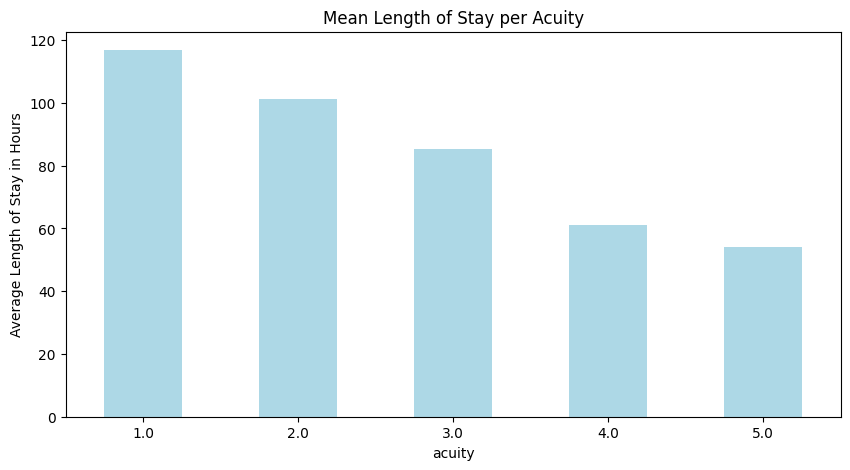

In [95]:
plt.figure(figsize=(10, 5))
admissions_triage.groupby('acuity')['admit_duration_hours'].mean().plot.bar(color='lightblue')
plt.xticks(rotation=0)
plt.title("Mean Length of Stay per Acuity")
plt.ylabel("Average Length of Stay in Hours")
plt.savefig('visualizations/mean-stay-per-acuity.png')
plt.show()

### processing the chiefcomplaints feature

In [143]:
triage_cleaned.chiefcomplaint

0                                      Hypotension
1                   Abd pain, Abdominal distention
2                                  n/v/d, Abd pain
3                             Abdominal distention
4         Abdominal distention, Abd pain, LETHAGIC
                            ...                   
425081                              L Leg weakness
425082                                Abnormal MRI
425083                        Abd pain, Wound eval
425084                        Abd pain, Wound eval
425085        Altered mental status, Substance use
Name: chiefcomplaint, Length: 390799, dtype: object

In [147]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/julienh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julienh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/julienh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [152]:

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to each row in your column
triage_cleaned.loc[:, 'processed_complaints'] = triage_cleaned[:, 'chiefcomplaint'].apply(preprocess_text)

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_37204/791978957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triage_cleaned['processed_complaints'] = triage_cleaned.loc[:, 'chiefcomplaint'].apply(preprocess_text)


In [154]:
triage_cleaned.head(3)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,processed_complaints
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension,[hypotension]
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention","[abd, pain, abdominal, distention]"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain","[nvd, abd, pain]"


In [156]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents
dictionary = Dictionary(triage_cleaned['processed_complaints'])

# Filter extremes (you can fine-tune these parameters)
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create a Bag-of-Words (BoW) corpus
corpus = [dictionary.doc2bow(doc) for doc in triage_cleaned['processed_complaints']]


In [157]:
from gensim.models import LdaModel

# Set the number of topics you want to identify (e.g., 5 topics)
num_topics = 5

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Show the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.145*"r" + 0.121*"pain" + 0.109*"transfer" + 0.060*"weakness" + 0.033*"abnormal" + 0.032*"arm" + 0.032*"lab" + 0.026*"syncope" + 0.025*"leg" + 0.023*"left"
Topic 1: 0.148*"sp" + 0.138*"fall" + 0.130*"dyspnea" + 0.063*"dizziness" + 0.057*"swelling" + 0.049*"cough" + 0.047*"si" + 0.033*"throat" + 0.032*"mvc" + 0.030*"sore"
Topic 2: 0.105*"fever" + 0.074*"etoh" + 0.051*"injury" + 0.041*"ili" + 0.040*"laceration" + 0.037*"hand" + 0.035*"vomiting" + 0.033*"head" + 0.032*"finger" + 0.028*"abnormal"
Topic 3: 0.329*"pain" + 0.108*"abd" + 0.086*"chest" + 0.053*"back" + 0.043*"abdominal" + 0.029*"nv" + 0.027*"eval" + 0.027*"lower" + 0.023*"wound" + 0.016*"nausea"
Topic 4: 0.185*"l" + 0.178*"pain" + 0.088*"headache" + 0.041*"knee" + 0.037*"injury" + 0.033*"leg" + 0.030*"right" + 0.025*"diarrhea" + 0.025*"foot" + 0.024*"flank"


In [158]:
def assign_topic(lda_model, corpus, dictionary, complaint):
    bow = dictionary.doc2bow(complaint)
    topic_distribution = lda_model.get_document_topics(bow)
    # Select the topic with the highest probability
    return max(topic_distribution, key=lambda x: x[1])[0]

triage_cleaned.loc[:, 'topic'] = triage_cleaned['processed_complaints'].apply(lambda x: assign_topic(lda_model, corpus, dictionary, x))

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_37204/2580680203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  triage_cleaned['topic'] = triage_cleaned['processed_complaints'].apply(lambda x: assign_topic(lda_model, corpus, dictionary, x))


In [159]:
triage_cleaned['topic']

0         2
1         3
2         3
3         3
4         3
         ..
425081    4
425082    2
425083    3
425084    3
425085    3
Name: topic, Length: 390799, dtype: int64

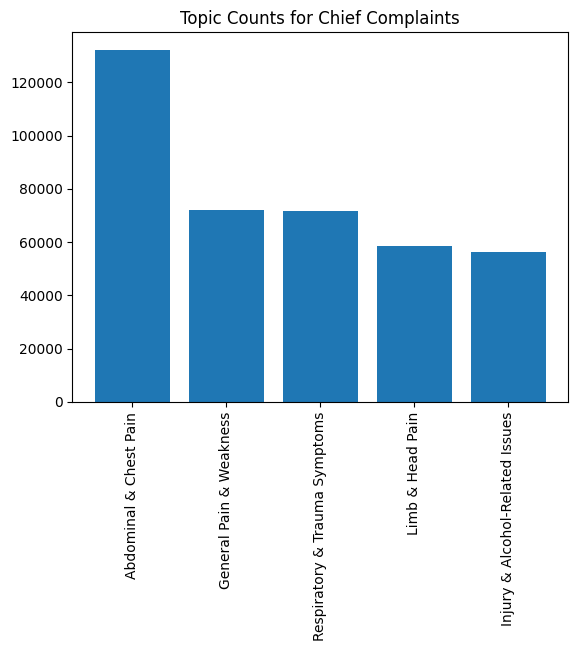

In [185]:
topic_labels = {
    0: "General Pain & Weakness",
    1: "Respiratory & Trauma Symptoms",
    2: "Injury & Alcohol-Related Issues",
    3: "Abdominal & Chest Pain",
    4: "Limb & Head Pain"
}

triage_cleaned.loc[:, 'topic_label'] = triage_cleaned['topic'].map(topic_labels)

topic_counts = triage_cleaned['topic_label'].value_counts()

plt.bar(topic_counts.index, topic_counts)
plt.xticks(rotation = 90)
plt.title("Topic Counts for Chief Complaints")
plt.savefig("visualizations/topic-counts-complaints.png")
plt.show()

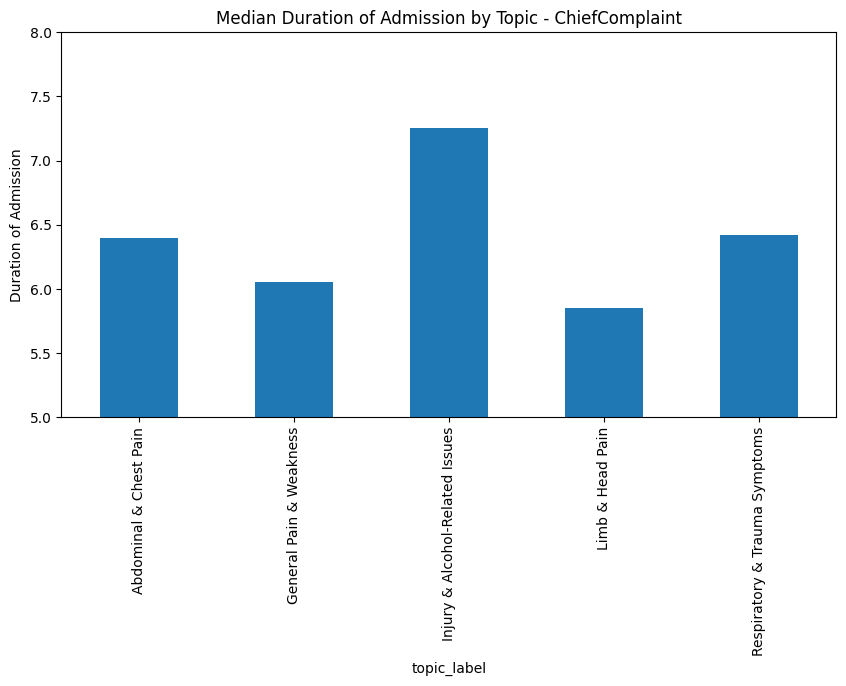

In [186]:
# explore duration by topic counts

stay_by_topic = triage_cleaned.merge(ed_stays, on = 'subject_id', how='inner')[['topic_label', 'length_of_stay_hour']]

plt.figure(figsize=(10, 5))
stay_by_topic.groupby("topic_label")['length_of_stay_hour'].median().plot.bar()
plt.title("Median Duration of Admission by Topic - ChiefComplaint")
plt.ylabel("Duration of Admission")
# zoom in
plt.ylim(5, 8)
plt.savefig("visualizations/admission-duration-by-topic.png")
plt.show()

## Exploring Diagnosis Table

In [54]:
diagnosis_df = pd.read_csv("ED/diagnosis.csv")

diagnosis_df.head()

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [55]:
diagnosis_df.icd_code.nunique()

13199

In [56]:
diagnosis_df.icd_version.unique()

array([ 9, 10])

We verify there are the two icd versions 9 and 10

In [57]:
diagnosis_df.icd_version.value_counts()

icd_version
10    456035
9     443015
Name: count, dtype: int64

In [58]:
diagnosis_icd9 = diagnosis_df[diagnosis_df['icd_version'] == 9]
diagnosis_icd10 = diagnosis_df[diagnosis_df['icd_version'] == 10]

diagnosis_icd9.icd_code.nunique(), diagnosis_icd10.icd_code.nunique()

(4684, 8526)

In [59]:
diagnosis_icd9.icd_code.head(10)

0     4589
1    07070
2      V08
3     5728
4    78959
5    07070
6      V08
7     5715
8    78900
9      V08
Name: icd_code, dtype: object

In [60]:
diagnosis_icd10.icd_code.head(10)

16       R531
17        G20
18      R4182
19      F0390
23    S0181XD
24    V00131D
25    S025XXA
26    S0181XA
27    W1789XA
28    S098XXA
Name: icd_code, dtype: object

In [61]:
top_50_diagnosis = diagnosis_icd10.icd_title.value_counts()[:50].reset_index()

top_50_diagnosis['pct'] = top_50_diagnosis['count'] / diagnosis_icd10.shape[0] * 100

top_50_diagnosis

,icd_title,count,pct
0,Essential (primary) hypertension,21264,4.662800
1,"Chest pain, unspecified",13016,2.854167
2,Unspecified abdominal pain,10504,2.303332
3,Type 2 diabetes mellitus without complications,8801,1.929896
4,"Fall on same level, unspecified, initial encou...",7817,1.714123
5,"Dyspnea, unspecified",7080,1.552512
6,"Alcohol abuse with intoxication, unspecified",6871,1.506683
7,Headache,6841,1.500104
8,"Urinary tract infection, site not specified",5898,1.293322
9,Weakness,5871,1.287401


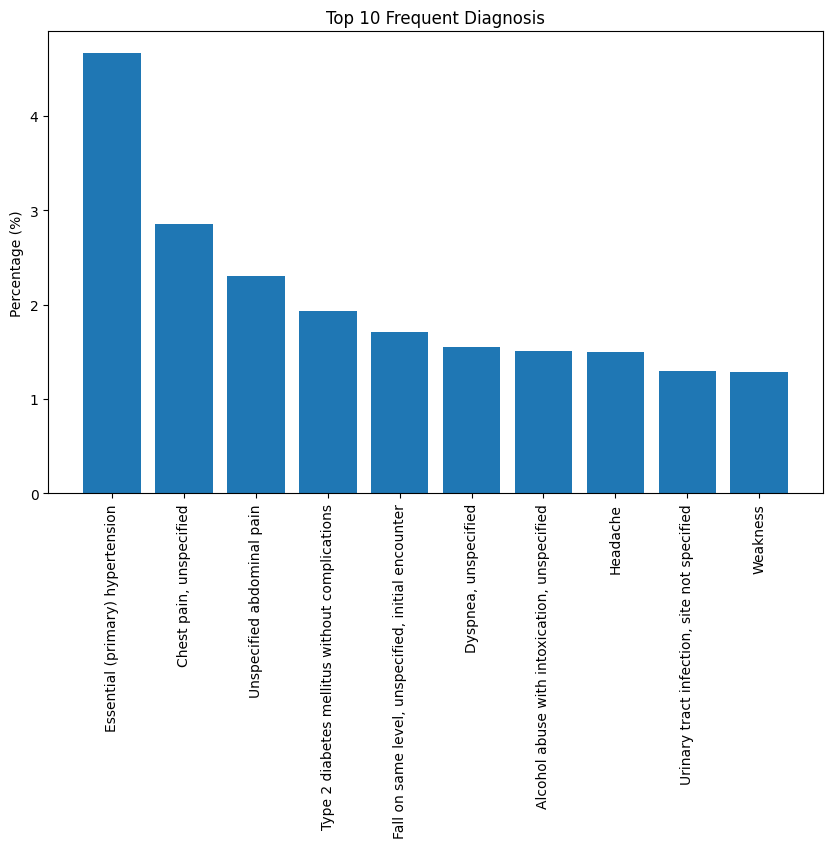

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(top_50_diagnosis.icd_title[:10], top_50_diagnosis.pct[:10])
plt.title("Top 10 Frequent Diagnosis")
plt.xticks(rotation = 90)
plt.ylabel("Percentage (%)")
plt.show()

# Merging Tables

Here we will start merging several tables and explore what insights/information we can gain 

## Merging Admissions and Ed Stays

Here we can combine on subject id and compare the length of stay between the general admissions (hospital) and emergency admissioins (ED)

In [32]:
# merge admissions and edstays

edstays_admissions = ed_stays.merge(admissions, on = 'subject_id', how = 'inner')

edstays_admissions.iloc[:, 3:].head()

,intime,outtime,gender,race_x,arrival_transport,disposition,length_of_stay,length_of_stay_hour,arrival_hour,departure_hour,...,insurance,language,marital_status,race_y,edregtime,edouttime,hospital_expire_flag,admit_duration,admit_duration_hours,admit_duration_days
0,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,253.0,4.216667,19,23,...,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,1132.0,18.866667,0.786111
1,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,253.0,4.216667,19,23,...,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1462.0,24.366667,1.015278
2,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,253.0,4.216667,19,23,...,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,2526.0,42.100000,1.754167
3,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,253.0,4.216667,19,23,...,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,3200.0,53.333333,2.222222
4,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,337.0,5.616667,15,21,...,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,1132.0,18.866667,0.786111


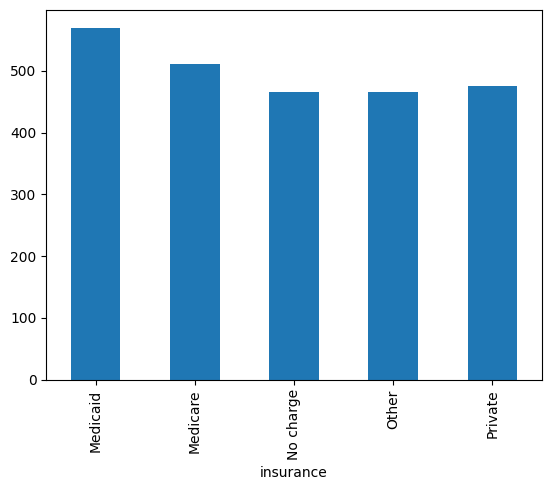

In [35]:
edstays_admissions.groupby("insurance")['length_of_stay'].mean().plot.bar();

<Axes: xlabel='race_x'>

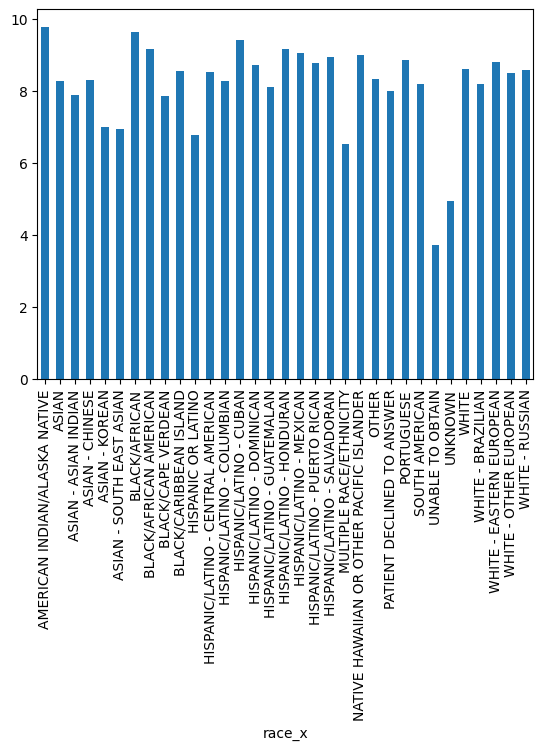

In [36]:
edstays_admissions.groupby("race_x")['length_of_stay_hour'].mean().plot.bar()

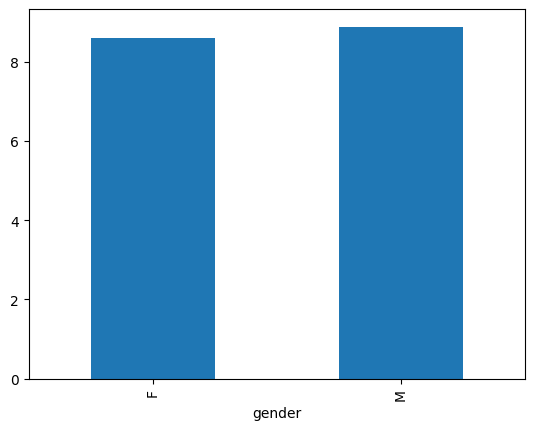

In [37]:
edstays_admissions.groupby("gender")['length_of_stay_hour'].mean().plot.bar();

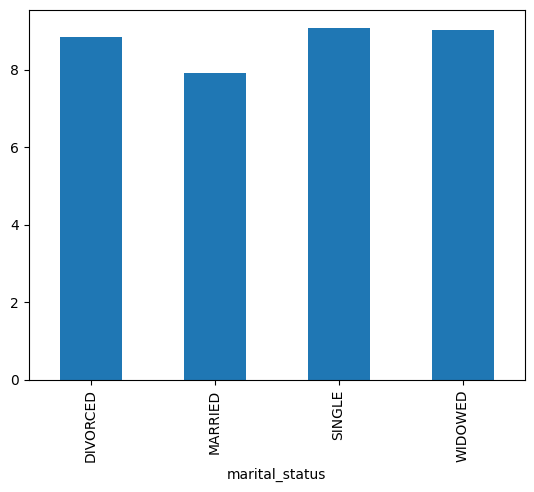

In [38]:
edstays_admissions.groupby("marital_status")['length_of_stay_hour'].mean().plot.bar();

<Axes: xlabel='admission_type'>

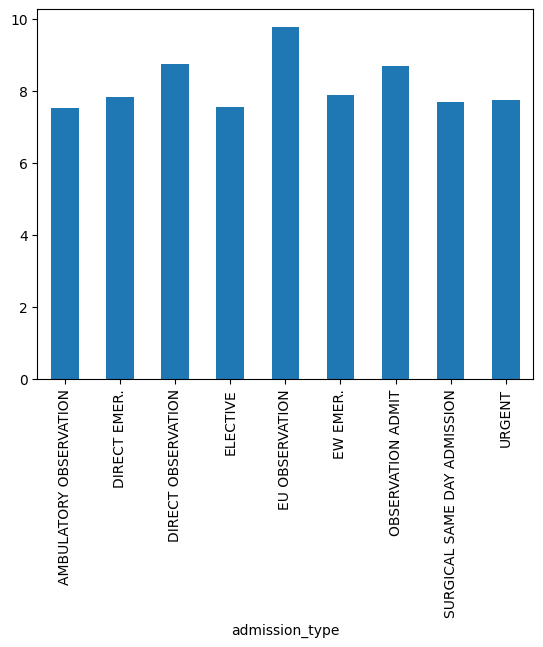

In [39]:
edstays_admissions.groupby('admission_type')['length_of_stay_hour'].mean().plot.bar()

# Model Interpretation

## Building A Classifier for gain insight into actuity

Question: Can we perform feature engineering to merge datasets, create a training and test set and train a classifier to interpret its inner workings (coefficients, weights) and try to understand how to classify actuity better

In [134]:
!ls ED

diagnosis.csv edstays.csv   medrecon.csv  triage.csv    vitalsign.csv


In [128]:
!ls HOSP

admissions.csv transfers.csv


In [135]:
medrecon_df = pd.read_csv("ED/medrecon.csv")

medrecon_df.head()

,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives
3,10000032,32952584,2180-07-22 17:26:00,emtricitabine-tenofovir [Truvada],57883,35356007003,1,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,32952584,2180-07-22 17:26:00,fluticasone [Flovent HFA],21251,49999061401,1,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [136]:
ed_stays

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,length_of_stay,length_of_stay_hour,arrival_hour,departure_hour,month
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,253.000000,4.216667,19,23,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,337.000000,5.616667,15,21,6
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,286.000000,4.766667,20,1,8
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,810.000000,13.500000,16,5,7
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,486.000000,8.100000,5,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425082,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,408.483333,6.808056,14,21,6
425083,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED,541.000000,9.016667,9,18,1
425084,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1456.000000,24.266667,17,17,7
425085,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,15.000000,0.250000,11,11,12


In [138]:
triage_cleaned

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"
...,...,...,...,...,...,...,...,...,...,...,...
425081,19999784,35692999,98.6,80.0,18.0,100.0,161.0,100.0,0,3.0,L Leg weakness
425082,19999784,37972930,98.0,91.0,16.0,99.0,148.0,90.0,5,2.0,Abnormal MRI
425083,19999828,30712109,98.1,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval"
425084,19999828,32917002,96.6,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval"


In [133]:
diagnosis_df

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [199]:
triage_edstays = triage_cleaned.merge(ed_stays, on = 'subject_id', how = 'inner')

triage_edstays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076290 entries, 0 to 3076289
Data columns (total 28 columns):
 #   Column                Dtype         
---  ------                -----         
 0   subject_id            int64         
 1   stay_id_x             int64         
 2   temperature           float64       
 3   heartrate             float64       
 4   resprate              float64       
 5   o2sat                 float64       
 6   sbp                   float64       
 7   dbp                   float64       
 8   pain                  object        
 9   acuity                float64       
 10  chiefcomplaint        object        
 11  processed_complaints  object        
 12  topic                 int64         
 13  topic_label           object        
 14  hadm_id               float64       
 15  stay_id_y             int64         
 16  intime                datetime64[ns]
 17  outtime               datetime64[ns]
 18  gender                object        
 19  

In [239]:
triage_edstays['acuity'] = triage_edstays['acuity'].fillna(triage_edstays['acuity'].mode()[0])

In [240]:
triage_edstays.isna().sum()

subject_id                    0
stay_id_x                     0
temperature                   0
heartrate                     0
resprate                      0
o2sat                         0
sbp                           0
dbp                           0
pain                      27852
acuity                        0
chiefcomplaint               48
processed_complaints          0
topic                         0
topic_label                   0
hadm_id                 1485390
stay_id_y                     0
intime                        0
outtime                       0
gender                        0
race                          0
arrival_transport             0
disposition                   0
length_of_stay                0
length_of_stay_hour           0
arrival_hour                  0
departure_hour                0
month                         0
race_grouped                  0
dtype: int64

In [241]:
X = triage_edstays[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'topic_label', 'gender', 'race_grouped', 'arrival_transport', 'disposition', 'length_of_stay', 'month']]
subjects_ids = triage_edstays['subject_id']

y = triage_edstays['acuity']

X.head()

,temperature,heartrate,resprate,o2sat,sbp,dbp,topic_label,gender,race_grouped,arrival_transport,disposition,length_of_stay,month
0,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,253.0,5
1,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,337.0,6
2,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,286.0,8
3,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,HOME,810.0,7
4,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,486.0,7


In [242]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076290 entries, 0 to 3076289
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   temperature        float64
 1   heartrate          float64
 2   resprate           float64
 3   o2sat              float64
 4   sbp                float64
 5   dbp                float64
 6   topic_label        object 
 7   gender             object 
 8   race_grouped       object 
 9   arrival_transport  object 
 10  disposition        object 
 11  length_of_stay     float64
 12  month              int32  
dtypes: float64(7), int32(1), object(5)
memory usage: 293.4+ MB


In [243]:
nunique_per_cat(X)

[('topic_label', 5),
 ('gender', 2),
 ('race_grouped', 6),
 ('arrival_transport', 5),
 ('disposition', 8)]

In [244]:
from sklearn.model_selection import train_test_split

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [245]:
# lets do num processing and cat processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('standardize', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# column transform
num_cols = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']
cat_cols = ['topic_label', 'gender', 'race_grouped', 'arrival_transport', 'disposition']

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [253]:
# get the feature names

cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

feature_names = list(num_cols) + list(cat_feature_names)

feature_names

['temperature',
 'heartrate',
 'resprate',
 'o2sat',
 'sbp',
 'dbp',
 'topic_label_Abdominal & Chest Pain',
 'topic_label_General Pain & Weakness',
 'topic_label_Injury & Alcohol-Related Issues',
 'topic_label_Limb & Head Pain',
 'topic_label_Respiratory & Trauma Symptoms',
 'gender_F',
 'gender_M',
 'race_grouped_Asian',
 'race_grouped_Black/African Descent',
 'race_grouped_Hispanic/Latino',
 'race_grouped_Mixed or Other',
 'race_grouped_Native American/Pacific Islander',
 'race_grouped_White/European Descent',
 'arrival_transport_AMBULANCE',
 'arrival_transport_HELICOPTER',
 'arrival_transport_OTHER',
 'arrival_transport_UNKNOWN',
 'arrival_transport_WALK IN',
 'disposition_ADMITTED',
 'disposition_ELOPED',
 'disposition_EXPIRED',
 'disposition_HOME',
 'disposition_LEFT AGAINST MEDICAL ADVICE',
 'disposition_LEFT WITHOUT BEING SEEN',
 'disposition_OTHER',
 'disposition_TRANSFER']

In [246]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((2461032, 32), (615258, 32))

In [247]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=4).fit(X_train_processed, y_train)

train_score = clf.score(X_train_processed, y_train)
test_score = clf.score(X_test_processed, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.6056625838266223
Test Score: 0.6048064389248088


In [270]:
from sklearn.metrics import classification_report

# a classification report
y_preds = clf.predict(X_test_processed)
print(classification_report(y_test, y_preds))

/Users/julienh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julienh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         1.0       0.79      0.17      0.28     18694
         2.0       0.62      0.03      0.06    194342
         3.0       0.60      1.00      0.75    364321
         4.0       0.00      0.00      0.00     35991
         5.0       0.00      0.00      0.00      1910

    accuracy                           0.60    615258
   macro avg       0.40      0.24      0.22    615258
weighted avg       0.58      0.60      0.47    615258



/Users/julienh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


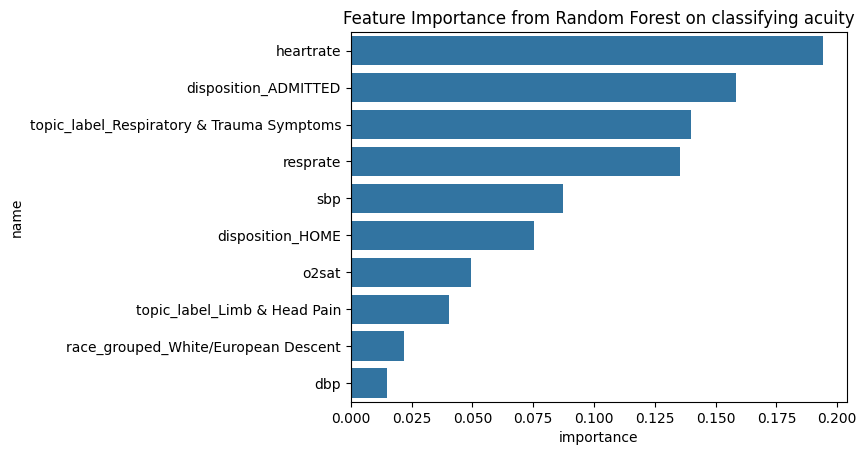

In [266]:

feature_names_importances = list(zip(feature_names, clf.feature_importances_))
sorted_features_by_importance = sorted(feature_names_importances, key = lambda x: x[1], reverse=True)

feature_importance_df = pd.DataFrame({
    'name': [x[0] for x in sorted_features_by_importance],
    'importance': [x[1] for x in sorted_features_by_importance]
})

sns.barplot(x = 'importance', y = 'name', data = feature_importance_df.iloc[:10])
plt.title("Feature Importance from Random Forest on classifying acuity")
plt.savefig('visualizations/feature-importance-random-forest.png')
plt.show()